In [3]:
cd ..

/home/samoht25/uclax-data-science/09-PCA-tutorial


In [4]:
import numpy as np
import pandas as pd
import scipy.linalg as sla
import matplotlib.pyplot as plt
from preamble import draw_vector, initialize_2d_plot
%matplotlib inline

In [14]:
np.eye(3,2)

array([[ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  0.]])

**Note** I will be using pandas for holding matrices because this conveniently allows us to index column vectors easily.

### The Identity Matrix

In [5]:
I_2 = pd.DataFrame(np.eye(2))

In [6]:
I_2

,0,1
0,1.0,0.0
1,0.0,1.0


### Plot the column vectors of the 2-D Identity, $I$

(-2, 2)

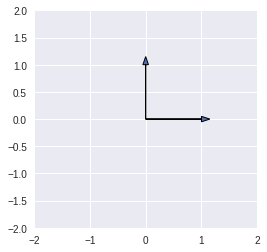

In [8]:
plt.figure(figsize=(4,4))
plt.arrow(0, 0, 1, 0, lw=1, head_width=.1)
plt.arrow(0, 0, 0, 1, lw=1, head_width=.1)
plt.xlim(-2,2)
plt.ylim(-2,2)

### What are the column vectors of the 2-D Identity in terms of Analytic Geometry?

Note also that the column vector of $I$ are orthogonal.

Recall that the dot product between two vectors can be defined in terms of the cosine of the angle between them.

$$\mathbf{u}^T\mathbf{v} = u\cdot v\cdot \cos \theta$$

If two vectors are orthogonal (perpendicular) then the angle between them will be 90° and and the cosine of the angle between them is zero. 

Therefore, two vectors are orthogonal if and only if  their dot product is zero.

In [15]:
I_2[0].dot(I_2[1])

0.0

## Matrix Decomposition

A decomposition is the breaking of a matrix into a series of matrix multiplications. 

A very canonical decomposition is the QR factorization where $Q$ is an orthogonal matrix and $R$ is an upper triangular matrix. Thus we might have a matrix $X$ and we seek 

$$X=QR$$

In [27]:
W = np.random.rand(4).reshape(2,2)
X = pd.DataFrame(W.T.dot(W))
X

,0,1
0,0.369480,0.530496
1,0.530496,0.842782


**Advanced Note** We create a new random matrix $W$, then define $X$ to be $W^TW$. In doing so, $X$ is 

1. symmetric
2. positive definite

This second point guarantees that we will have real (as opposed to complex) eigenvalues at the end of this notebook.

In [28]:
Q, R = sla.qr(X)
Q, R = pd.DataFrame(Q), pd.DataFrame(R)
display(Q)
display(R)

,0,1
0,-0.571522,-0.820587
1,-0.820587,0.571522


,0,1
0,-0.646484,-0.994766
1,0.000000,0.046351


### $Q$ is orthogonal

In [29]:
Q[0].dot(Q[1]) #orthogonal always have a dot product of 0. 

-1.6653345369377348e-16

In [30]:
Q.dot(R)

,0,1
0,0.369480,0.530496
1,0.530496,0.842782


In [31]:
X

,0,1
0,0.369480,0.530496
1,0.530496,0.842782


### $PLU$ Decomposition

In [32]:
P, L, U = sla.lu(X)
P, L, U = pd.DataFrame(P), pd.DataFrame(L), pd.DataFrame(U)
display(P)
display(L)
display(U)

,0,1
0,0.0,1.0
1,1.0,0.0


,0,1
0,1.00000,0.0
1,0.69648,1.0


,0,1
0,0.530496,0.842782
1,0.000000,-0.056485


In [33]:
P.dot(L).dot(U)

,0,1
0,0.369480,0.530496
1,0.530496,0.842782


In [34]:
X

,0,1
0,0.369480,0.530496
1,0.530496,0.842782


### Eigendecomposition

An eigendecomposition is a special kind of decomposition in which a matrix is decomposed into eigenvectors and eigenvalues which describe the essential nature of the matrix. 

"eigen" is German meaning "own", "self", or "essential". 

Under an eigendecomposition, a matrix is decomposed so that

$$X = V\Lambda V^T$$

where $V$ is a matrix of eigenvectors and $\Lambda$ is a diagonal matrix with corresponding eigenvalues on the diagonal.

The matrix $V$ is

$$ V=
\left(\begin{matrix}
\mathbf{v}_1 \dots \mathbf{v}_n 
\end{matrix}\right)
$$

where each $\mathbf{v}_i$ is a column-oriented eigenvector.

### The Eigen Equation

An eigenvector and corresponding eigenvalue are described by the following equation.

$$X\mathbf{v} = \lambda \mathbf{v}$$

In [35]:
eig_vals, eig_vecs = np.linalg.eig(X)

In [39]:
V.dot(V.T)

,0,1
0,1.000000e+00,-6.237851e-19
1,-6.237851e-19,1.000000e+00


In [40]:
V[0].dot(V[1])

0.0

In general, 

$$V V^T \neq I$$

In general,

$$V V^{-1} = I$$
if $V^{-1}$ exists

In [38]:
Lambda = pd.DataFrame(np.diag(eig_vals))
V = pd.DataFrame(eig_vecs)
display(Lambda)
display(V)

,0,1
0,0.025244,0.000000
1,0.000000,1.187018


,0,1
0,-0.838867,-0.544336
1,0.544336,-0.838867


In [41]:
V.dot(Lambda).dot(V.T)

,0,1
0,0.369480,0.530496
1,0.530496,0.842782


In [42]:
X

,0,1
0,0.369480,0.530496
1,0.530496,0.842782


### The Eigen Equation

$$X\mathbf{v} = \lambda \mathbf{v}$$

What this means is that multiplying a matrix by one of its eigenvectors gives a scalar multiple of that eigenvector. **The direction doesn't change!!**

In [43]:
V[0]

0   -0.838867
1    0.544336
Name: 0, dtype: float64

In [44]:
X.dot(V[0])

0   -0.021176
1    0.013741
dtype: float64

In [45]:
Lambda[0][0]*V[0]

0   -0.021176
1    0.013741
Name: 0, dtype: float64

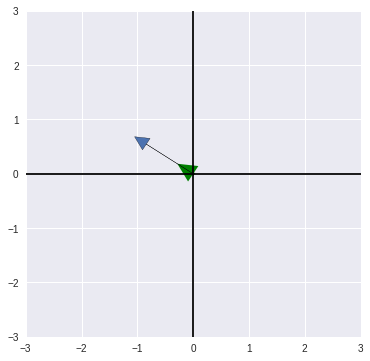

In [46]:
initialize_2d_plot(-3,3,-3,3)
draw_vector(X.dot(V[0]), kwargs={'color':'green', 'linewidth':3})
draw_vector(V[0])

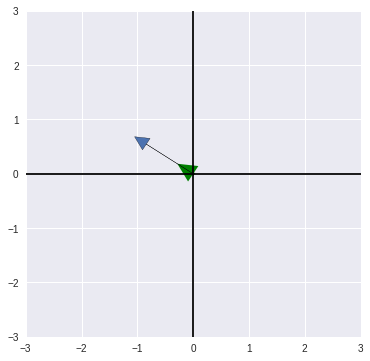

In [47]:
initialize_2d_plot(-3,3,-3,3)
draw_vector(Lambda[0][0]*V[0], kwargs={'color':'green', 'linewidth':3})
draw_vector(V[0])